#                                            PROBLEM SET - 3 
Student Id: 200493027

#                                         DATA PROGRAMMING      

# Question 1
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users

In [1]:
import pandas as pd
import numpy as np
fields = ['user_id','age','gender','occupation','zip_code']
fields1 = ['age','occupation']
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep = '|',usecols=fields)


# Question 1 Step 4 Discover what is the mean age per occupation


In [3]:
users.groupby(['occupation']).age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

# Question 1 Step 5 Discover the Male ratio per occupation and sort it from the most to the least

In [19]:
#create a method to calculate the num
def  CalculateRatio(gender): 
    if  gender=='M' : 
        return  1 
    if  gender=='F' : 
        return  0     
users ['new_gender']  =  users['gender'].apply (CalculateRatio)
ratio  =  users.groupby ('occupation' )[ 'new_gender' ].sum ()/users.occupation.value_counts() 
# users.occupation.value_counts() 
ratio.sort_values(ascending = False)

doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

# Q1 Step 6. For each occupation, calculate the minimum and maximum ages

In [7]:
users.groupby(['occupation','gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

# Step 7. For each combination of occupation and sex, calculate the mean age

In [18]:
#3For each occupation, calculate the minimum and maximum ages
minage =  users.groupby(['occupation']).age.min()
maxage =  users.groupby(['occupation']).age.max()
frames = [minage, maxage]
pd.concat(frames,axis=1)
frames

[occupation
 administrator    21
 artist           19
 doctor           28
 educator         23
 engineer         22
 entertainment    15
 executive        22
 healthcare       22
 homemaker        20
 lawyer           21
 librarian        23
 marketing        24
 none             11
 other            13
 programmer       20
 retired          51
 salesman         18
 scientist        23
 student           7
 technician       21
 writer           18
 Name: age, dtype: int64,
 occupation
 administrator    70
 artist           48
 doctor           64
 educator         63
 engineer         70
 entertainment    50
 executive        69
 healthcare       62
 homemaker        50
 lawyer           53
 librarian        69
 marketing        55
 none             55
 other            64
 programmer       63
 retired          73
 salesman         66
 scientist        55
 student          42
 technician       55
 writer           60
 Name: age, dtype: int64]

# Step 8. For each occupation present the percentage of women and men

In [55]:
#create a method to calculate the num
#create a method to calculate the num
def  CalculateMalePercentage(gender): 
    if  gender=='M' : 
        return  1 
    if  gender=='F' : 
        return  0     
def  CalculateFeMalePercentage(gender): 
    if  gender=='M' : 
        return  0 
    if  gender=='F' : 
        return  1  
users ['male_percentage']  =  users['gender'].apply (CalculateMalePercentage)
users ['female_percentage']  =  users['gender'].apply (CalculateFeMalePercentage)
Temp1 =  users.groupby ('occupation' )[ 'male_percentage' ].sum ()/users.occupation.value_counts() * 100
Temp2 =  users.groupby ('occupation' )[ 'female_percentage' ].sum ()/users.occupation.value_counts() * 100
# users.occupation.value_counts() 
male_percentage_df = pd.DataFrame(Temp1)
female_percentage_df = pd.DataFrame(Temp2)
male_percentage_df.columns = ['percent']
female_percentage_df.columns = ['percent']
#female_percentage_df.columns = ['Occupation', 'male_percentage']
male_percentage_df.merge(female_percentage_df)
new_frames = [male_percentage_df,female_percentage_df]
final=pd.concat(new_frames,axis=1)
final.columns = ['male_percentage', 'female_percentage']
final


,male_percentage,female_percentage
administrator,54.430380,45.569620
artist,53.571429,46.428571
doctor,100.000000,0.000000
educator,72.631579,27.368421
engineer,97.014925,2.985075
entertainment,88.888889,11.111111
executive,90.625000,9.375000
healthcare,31.250000,68.750000
homemaker,14.285714,85.714286
lawyer,83.333333,16.666667


# Question 2

In [3]:
url1 = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url1)
#select only goal columns
#euro12['Goals']
# How many team participated in the Euro2012?
#euro12['Team'].count()
#What is the number of columns in the dataset?
#len(euro12.columns)
#View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
#discipline= euro12[['Team', 'Yellow Cards','Red Cards']]
#discipline
#Sort the teams by Red Cards, then to Yellow Cards
#euro12.sort_values(['Red Cards','Yellow Cards'])
#Calculate the mean Yellow Cards given per Team
# remove special character
#euro12.columns = euro12.columns.str.replace(' ', '')
#euro12.groupby(['Team']).YellowCards.mean()
#Filter teams that scored more than 6 goalsStep
#filtered_euro12= euro12[(euro12.Goals > 6)]
#filtered_euro12
#Select the first 7 columns
#first_n_columns  = euro12.iloc[: , :7]
#first_n_columns
#Select all columns except the last 3
#Except_last3  = euro12.iloc[: , :(len(euro12.columns)-3)]
#Except_last3
#Present only the Shooting Accuracy from England, Italy and Russia
#filtered_euro12= euro12[(euro12.Team == 'England') | (euro12.Team == 'Italy') | (euro12.Team == 'Russia')]
#filtered_euro12['Shooting Accuracy']

# Step 4. Select only the Goal column

In [6]:
goals=euro12['Goals']
pd.DataFrame(goals)

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


# Q2 Step 5. How many team participated in the Euro2012?

In [10]:
print('Totally',euro12['Team'].count(),'Trams participated')

Totally 16 Trams participated


# Q2 Step 6. What is the number of columns in the dataset?

In [11]:
print('Totally',len(euro12.columns),'columns are there in the dataset')

Totally 35 columns are there in the dataset


# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline


In [12]:
discipline= euro12[['Team', 'Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


# Q2 Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [13]:
euro12.sort_values(['Red Cards','Yellow Cards'])

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
15,Ukraine,2,7,26,21.2%,6.0%,38,0,0,0,...,13,76.5%,48,31,4,5,0,9,9,18
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
12,Russia,5,9,31,22.5%,12.5%,59,2,0,0,...,10,77.0%,34,43,4,6,0,7,7,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
14,Sweden,5,17,19,47.2%,13.8%,39,3,0,0,...,8,61.6%,35,51,7,7,0,9,9,18
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16


# Q2 Step 9. Calculate the mean Yellow Cards given per Team

In [15]:
#remove special character
euro12.columns = euro12.columns.str.replace(' ', '')
pd.DataFrame(euro12.groupby(['Team']).YellowCards.mean())

,YellowCards
Team,
Croatia,9
Czech Republic,7
Denmark,4
England,5
France,6
Germany,4
Greece,9
Italy,16
Netherlands,5


# Q2 Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G


In [16]:
#Filter teams that scored more than 6 goalsStep
filtered_euro12= euro12[(euro12.Goals > 6)]
filtered_euro12

,Team,Goals,Shotsontarget,Shotsofftarget,ShootingAccuracy,%Goals-to-shots,Totalshots(inc.Blocked),HitWoodwork,Penaltygoals,Penaltiesnotscored,...,Savesmade,Saves-to-shotsratio,FoulsWon,FoulsConceded,Offsides,YellowCards,RedCards,Subson,Subsoff,PlayersUsed
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


# Q2 Step 12. Select the first 7 columns

In [17]:
first_n_columns  = euro12.iloc[: , :7]
first_n_columns

,Team,Goals,Shotsontarget,Shotsofftarget,ShootingAccuracy,%Goals-to-shots,Totalshots(inc.Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


# Q2 Step 13. Select all columns except the last 3

In [18]:
Except_last3  = euro12.iloc[: , :(len(euro12.columns)-3)]
Except_last3

,Team,Goals,Shotsontarget,Shotsofftarget,ShootingAccuracy,%Goals-to-shots,Totalshots(inc.Blocked),HitWoodwork,Penaltygoals,Penaltiesnotscored,...,CleanSheets,Blocks,Goalsconceded,Savesmade,Saves-to-shotsratio,FoulsWon,FoulsConceded,Offsides,YellowCards,RedCards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


# Q2 Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [27]:
filtered_euro12= euro12[(euro12.Team == 'England') | (euro12.Team == 'Italy') | (euro12.Team == 'Russia')]
pd.DataFrame(filtered_euro12[['Team','ShootingAccuracy']])

,Team,ShootingAccuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3 Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000


In [28]:
import pandas as pd
import numpy as np


Array1 = np.random.randint(1,4,size=(100))
Array2 = np.random.randint(1,3,size=(100))
Array3 = np.random.randint(10000,30000,size=(100))
Series1 = pd.Series(data=Array1)
Series2 = pd.Series(data=Array2)
Series3 = pd.Series(data=Array3)



# Q3 . 
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [30]:
data = {"bedrs": Series1,
        "bathrs": Series2,
        "price_sqr_meter": Series3}

df = pd.concat(data,
               axis = 1)
df1 = pd.concat(data,
               axis = 0)
df1.reset_index(drop=True, inplace=True)
pd.DataFrame(df1)

,0
0,3
1,2
2,3
3,2
4,2
...,...
295,28846
296,28588
297,13157
298,29603


# Question 4 Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].

In [32]:
import pandas as pd
import numpy as np
import datetime

#file = open("Wind.txt","r")
df = pd.read_csv("Wind.txt",delimiter=r"\s+",parse_dates= {"DateTime" : ["Yr","Mo","Dy"]}) 
#if dd.year > 2005:
#   dd = dd.replace(year=dd.year-100)

df["DateTime"] = np.where(pd.DatetimeIndex(df["DateTime"]).year < 2000,df.DateTime,df.DateTime - pd.offsets.DateOffset(years=100))
df
indexed_data = df.set_index("DateTime")
indexed_data.index.astype("datetime64[ns]")
indexed_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
DateTime,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


# Q4 Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [33]:
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      indexed_data.isnull().sum().sum())

 
Count total NaN at each column in a DataFrame : 

 31


# Q4 Step 7. Compute how many non-missing values there are in total.

In [34]:
print("Total Non-missing values are :",indexed_data.count().sum())

Total Non-missing values are : 78857


# Q4 Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

In [36]:
print("Mean wind speeds of over all locations :",indexed_data.mean().mean())

Mean wind speeds of over all locations : 10.227982360836924


# Q4 Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days


In [47]:
def caluateArith(data):
    newdata = pd.Series(data)
    minval = newdata.min()
    maxval = newdata.max()
    meanval = newdata.mean()
    Std = newdata.std()
    res = [minval,maxval,meanval,Std]
    indx = ["minval","maxval","meanval","Std"]
    res = pd.Series(res,index=indx)
    return res
loc_stats = indexed_data.apply(caluateArith)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
minval,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
maxval,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
meanval,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
Std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


# Q4 Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

In [50]:
day_stats = indexed_data.apply(caluateArith,axis=1)
day_stats.head()

,minval,maxval,meanval,Std
DateTime,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


# Q4 Step 11. Find the average windspeed in January for each location.Treat January 1961 and January 1962 both as January.


In [52]:
jan_data = indexed_data[indexed_data.index.month == 1]
print ("January windspeeds:")
print (jan_data.mean())

January windspeeds:
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


# Q4 Step 12. Downsample the record to a yearly frequency for each location.

In [53]:
print( "Yearly:\n", indexed_data.resample('A').mean())

Yearly:
                   RPT        VAL        ROS       KIL        SHA       BIR  \
DateTime                                                                     
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507  

# Q4 Step 13. Downsample the record to a monthly frequency for each location.


In [54]:
print ("Monthly:", indexed_data.resample('M').mean())

Monthly:                   RPT        VAL        ROS       KIL        SHA        BIR  \
DateTime                                                                      
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161

# Q4 Step 14. Downsample the record to a weekly frequency for each location.

In [56]:
print ("Weekly:", indexed_data.resample('W').mean())

Weekly:                   RPT        VAL        ROS        KIL        SHA        BIR  \
DateTime                                                                       
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429

# Q4 Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks

In [57]:
indexed_data = indexed_data.groupby(lambda d: (d.month, d.year))
print ("Mean wind speed for each month in each location")
print (indexed_data.mean())

Mean wind speed for each month in each location
                  RPT        VAL        ROS       KIL        SHA        BIR  \
(1, 1961)   14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
(1, 1962)   14.783871  13.160323  12.591935  7.538065  11.779677   8.720000   
(1, 1963)   14.868387  11.112903  15.121613  6.635806  11.080645   7.835484   
(1, 1964)   12.661290  11.818387  11.741290  6.953548  11.400645   6.865806   
(1, 1965)   15.741613  15.546774  15.274194  8.258387  13.588065   9.251290   
...               ...        ...        ...       ...        ...        ...   
(12, 1974)  18.511290  17.805806  14.773871  9.734839  16.944194  10.153871   
(12, 1975)  11.655484   8.686774  11.217742  4.478387   6.628710   4.178065   
(12, 1976)  11.962258  10.086774  10.474516  3.383871   7.645484   6.148387   
(12, 1977)  14.751935  12.744839  13.469677  6.592258  11.247742   9.466774   
(12, 1978)  16.175484  13.748065  15.635161  7.094839  11.398710   9.241613   

   

# Question 5
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries# Q4 

In [58]:
import pandas as pd
import numpy as np
new_fields = ['order_id','quantity','item_name','choice_description','item_price']
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep = '\t',usecols=new_fields)
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


# Q5 Step 4. See the first 10 entries

In [59]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


# Q5 Step 5. What is the number of observations in the dataset?

In [61]:
print('Total number of observations',chipo.shape[0])

Total number of observations 4622


# Q5 Step 6. What is the number of columns in the dataset?

In [63]:
print('Number of columns in the data set',chipo.shape[1])

Number of columns in the data set 5


# Q5 Step 7. Print the name of all the columns.

In [65]:
print(chipo.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


# Q5 Step 8. How is the dataset indexed?

In [66]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

# Q5 Step 9. Which was the most-ordered item?

In [67]:
chipo.item_name.value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

# Q5 Step 10. For the most-ordered item, how many items were ordered?

In [68]:
chipo.item_name.unique().shape[0]

50

# Q5 Step 11. What was the most ordered item in the choice_description column?

In [69]:
chipo.choice_description.value_counts().head()

[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
Name: choice_description, dtype: int64

# Q5 Step 12. How many items were orderd in total?

In [70]:
chipo.quantity.sum()

4972

# Q5 Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type


In [71]:
def num_float(x):
    return float(x[1:-1])
chipo.item_price = chipo.item_price.apply(num_float)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


# Q5 Step 14. How much was the revenue for the period in the dataset?

In [72]:
chipo.item_price.sum()

34500.16

# Q5 Step 15. How many orders were made in the period?

In [73]:
chipo.tail()

,order_id,quantity,item_name,choice_description,item_price
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",8.75


# Q5 Step 16. What is the average revenue amount per order?

In [74]:
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped['quantity'].mean()

2.711014176663032

# Q5 Step 17. How many different items are sold?

In [75]:
chipo['unit_price'] = (chipo['item_price'] / chipo['quantity'])
new = chipo[['item_name', 'choice_description', 'unit_price']]
new.sort_values(by='unit_price', ascending=False)

,item_name,choice_description,unit_price
2442,Barbacoa Salad Bowl,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.89
2957,Steak Salad Bowl,"[Fresh Tomato Salsa, [Black Beans, Cheese, Gua...",11.89
613,Steak Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.89
2401,Steak Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Guaca...",11.89
281,Steak Salad Bowl,"[Tomatillo Red Chili Salsa, [Black Beans, Chee...",11.89
...,...,...,...
378,Canned Soda,[Mountain Dew],1.09
1805,Canned Soda,[Sprite],1.09
2520,Canned Soda,[Coca Cola],1.09
2981,Bottled Water,NaN,1.09


# Question 6 
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!


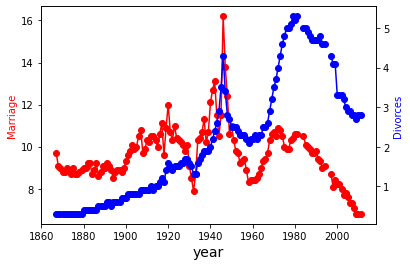

<Figure size 72000x72000 with 0 Axes>

In [76]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
#file = open("Wind.txt","r")
df = pd.read_csv("us-marriages-divorces-1867-2014.csv")

#lines1 = df.plot.line(x='Year', y='Marriages_per_1000')
#lines1 = df.plot.line(x='Year', y='Divorces_per_1000',secondary_y = True)




# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df['Year'], df['Marriages_per_1000'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Marriage",color="red",fontsize=10)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df['Year'], df['Divorces_per_1000'],color="blue",marker="o")
ax2.set_ylabel("Divorces",color="blue",fontsize=10)
plt.figure(figsize=(1000,1000))
plt.show()

# Question 7 
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

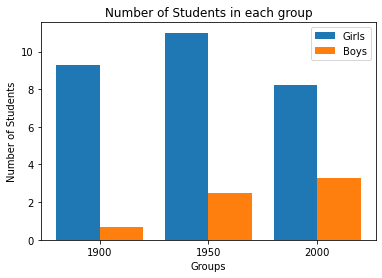

In [27]:

import numpy as np 
import matplotlib.pyplot as plt 

df = pd.read_csv("us-marriages-divorces-1867-2014.csv")
df1= df[(df.Year == 1900) | (df.Year == 1950) | (df.Year == 2000)]
X = df1['Year']
Ygirls = df1['Marriages_per_1000']
Zboys = df1['Divorces_per_1000']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

# Question 8 
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

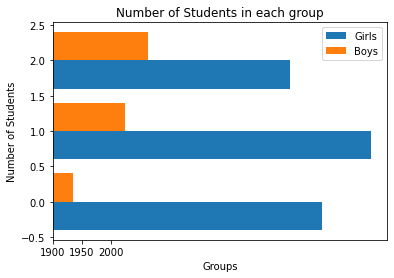

In [28]:

import numpy as np 
import matplotlib.pyplot as plt 

df = pd.read_csv("actor_kill_counts")
df1= df[(df.Year == 1900) | (df.Year == 1950) | (df.Year == 2000)]
X = df1['Year']
Ygirls = df1['Marriages_per_1000']
Zboys = df1['Divorces_per_1000']
  
X_axis = np.arange(len(X))
  
plt.barh(X_axis - 0.2, Ygirls, 0.4, label = 'Girls')
plt.barh(X_axis + 0.2, Zboys, 0.4, label = 'Boys')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

# Question 9 
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.


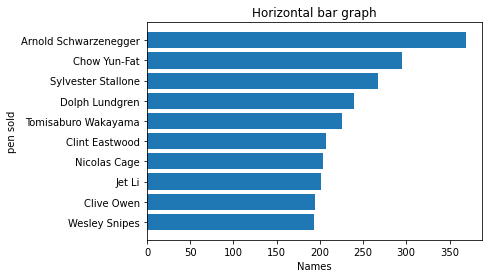

In [71]:

import numpy as np 
import matplotlib.pyplot as plt 

dfa = pd.read_csv("actor_kill_counts.csv")
df_sorteda = dfa.sort_values('Count')

y=df['Actor']
x=df['Count']
#plt.barh(range(len(df['Actor'])), sorted(df['Count']), color='red', alpha=0.5)
plt.barh(df_sorteda['Actor'],df_sorteda['Count'],data=df_sorteda) 
#setting label of y-axis
plt.ylabel("pen sold")
 
#setting label of x-axis
plt.xlabel("Names")
plt.title("Horizontal bar graph")
plt.show()

# Question 10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

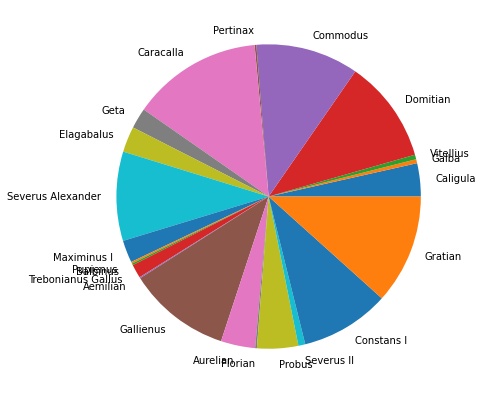

In [78]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np


dfp = pd.read_csv("roman-emperor-reigns.csv")
dfp= dfp[(dfp.Cause_of_Death == 'Assassinated')] 
datap = dfp['Length_of_Reign']

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(datap, labels = dfp['Emperor'])


# show plot
plt.show()

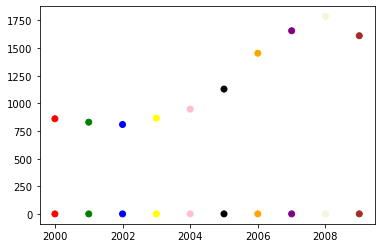

In [87]:
import numpy as np 
import matplotlib.pyplot as plt 

dfr = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")
x = dfr['Year']
y = dfr['Total Arcade Revenue (billions)']
colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown"])
plt.scatter(x, y,c=colors)

y = dfr['Computer Science Doctorates Awarded (US)']
plt.scatter(x, y,c=colors)
plt.show()